**Airbnb Calendar Exploratory Data Analysis**

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [112]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in Data**

In [97]:
#Set path to local machine for data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

#Read in Airbnb Calendar data
calendar = pd.read_csv(path + '2020_0407_Calendar_Cleaned.csv', sep = ',',
                       parse_dates=['date'], low_memory=True,index_col=0)

**Set notebook preferences**

In [98]:
#Set plot aesthetics for notebook
plt.style.use('Solarize_Light2')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_rows',100)

#Set float format
pd.options.display.float_format = '{:.0f}'.format

#supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preview Data

## Airbnb Calendar Data

In [99]:
#View shape and preview calendar data
print(calendar.shape)
calendar.head()

(16010035, 3)


,available,listing_id,price
date,,,
2019-04-03,0,187730,80
2019-04-04,0,187730,80
2019-04-05,1,187730,82
2019-04-06,1,187730,82
2019-04-07,1,187730,81


# Exploratory Data Analysis

## Data distributions

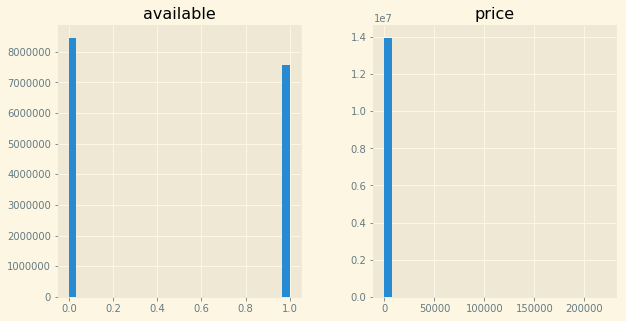

In [100]:
calendar[['available', 'price']].hist(figsize= (10,5), bins = 30);

## Naive time series

### Explore the listings count over the last 18 months

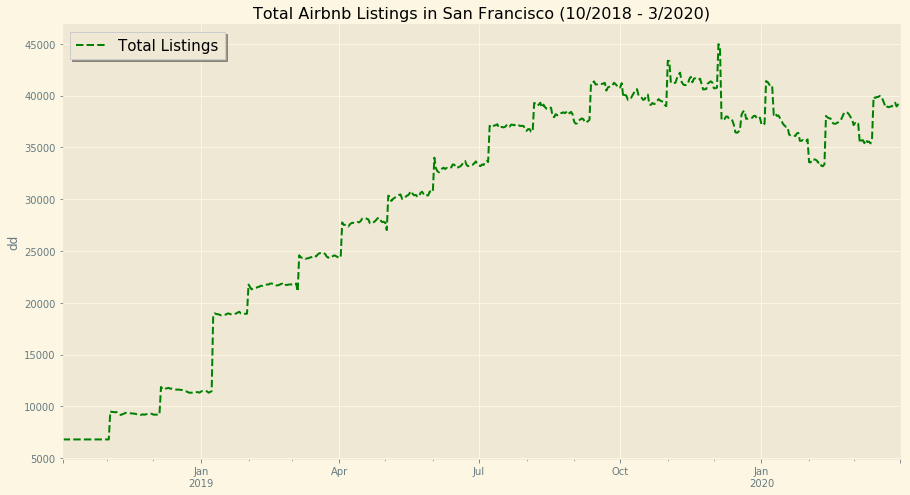

In [101]:
#Plot count of totdal listings per day
ax = calendar.groupby(['date'])['listing_id'].count().plot(figsize = (15,8), 
                                                           markersize = 1, linestyle = '--',
                                                            color = 'g', label = 'Total Listings')

####Set plot aesthetics
#Title
ax.set_title('Total Airbnb Listings in San Francisco (10/2018 - 3/2020)')

#Axes
ax.set_xlabel('')
ax.set_ylabel('dd')



#Legend
ax.legend(frameon = True, loc = 'upper left',fancybox = False, shadow = True, fontsize = 15)

**Comparing time series of available to unavailable listings** 

In [102]:
#Create df's that capture counts of available and unavailable listings
available_listings = calendar[calendar['available']==1].groupby(['date'])['listing_id'].count().reset_index()
unavailable_listings = calendar[calendar['available'] == 0].groupby(['date'])['listing_id'].count().reset_index()

#Clean-up headers 
available_listings.columns = ['date', 'count']
unavailable_listings.columns = ['date', 'count']

#Set Date as index
available_listings.set_index('date', inplace=True)
unavailable_listings.set_index('date', inplace=True)

In [103]:
#Check
display(available_listings.head(3))
display(unavailable_listings.head(3))

,count
date,
2018-10-03,910
2018-10-04,1001
2018-10-05,960


,count
date,
2018-10-03,5897
2018-10-04,5806
2018-10-05,5847


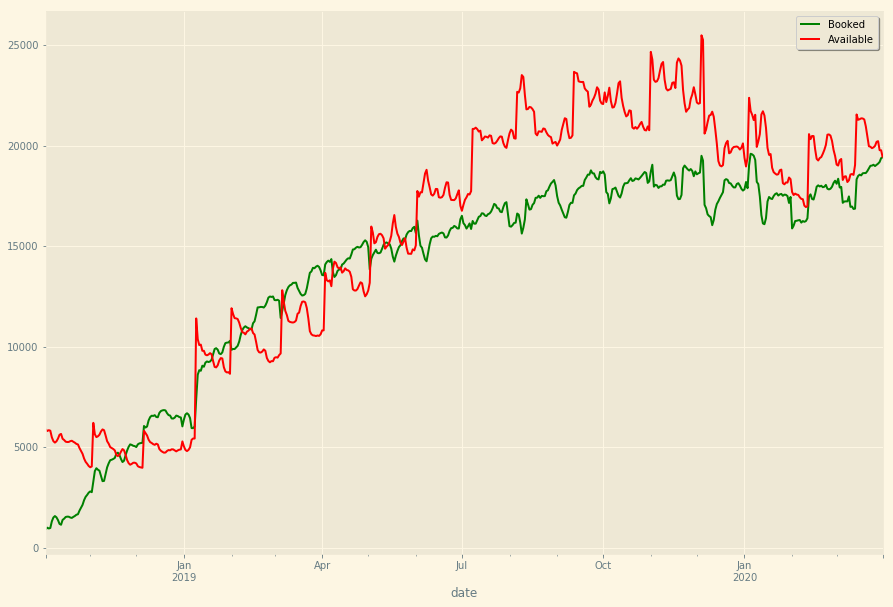

In [104]:
#Set plot figure
fig, ax = plt.subplots(figsize = (15,10))

#Plot Data
j = available_listings.plot(color = 'g',ax=ax)
g = unavailable_listings.plot(color = 'r', ax=ax)

#Plot intersection points


###Set plot Aesthetics###
#Title

#Axes

#Legend
ax.legend(labels = ['Booked', 'Available'],frameon = True, shadow = True)

Let's look a little closer 

- Merge data frames X
- Clean up visuals
- Extract data by month X
- Extract data by days of week X
- Extract data from most expensive/booked days of the year to travel

Extracting Count data by month and days of the week

In [110]:
#Merge unavailable_listings available_listings df's together
count_df = available_listings.merge(unavailable_listings, 
                                    left_index=True,right_index=True, 
                                    suffixes=('_available','_unavailable'))
#Total listings
count_df['total'] = count_df['count_available'] + count_df['count_unavailable']

#Reset Index to extract time data
count_df.reset_index(inplace = True)

#Extract data from index
count_df['weekday'] = count_df['date'].dt.day_name()
count_df['month'] = count_df['date'].dt.month
count_df['year'] = count_df['date'].dt.year

#Set date as index
count_df.set_index('date', inplace = True)

#Check
display(count_df.head())

,count_available,count_unavailable,total,weekday,month,year
date,,,,,,
2018-10-03,910,5897,6807,Wednesday,10,2018
2018-10-04,1001,5806,6807,Thursday,10,2018
2018-10-05,960,5847,6807,Friday,10,2018
2018-10-06,985,5822,6807,Saturday,10,2018
2018-10-07,1314,5493,6807,Sunday,10,2018


Most booked days of the week?

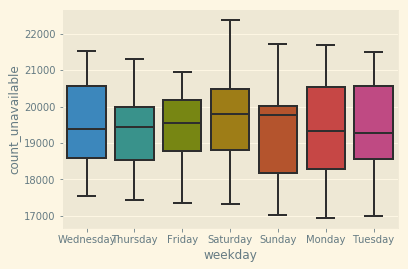

In [144]:
sns.boxplot(x = 'weekday', y='count_unavailable', data = count_df[count_df['year']==2020])

Most booked months of the year?

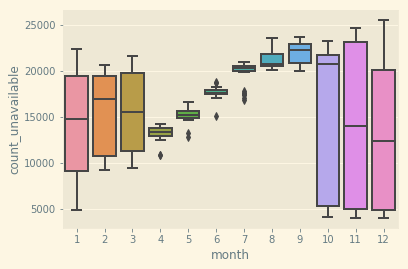

In [118]:
sns.boxplot(x = 'month', y='count_unavailable', data = count_df)

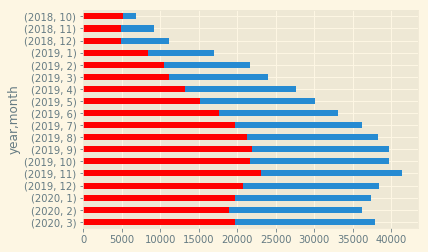

In [130]:
count_df.groupby(['year','month'])['total'].mean().plot(kind = 'barh')
count_df.groupby(['year','month'])['count_unavailable'].mean().plot(kind = 'barh', color = 'r') #Bookings

plt.gca().invert_yaxis()


## Explore prices over last 18 months

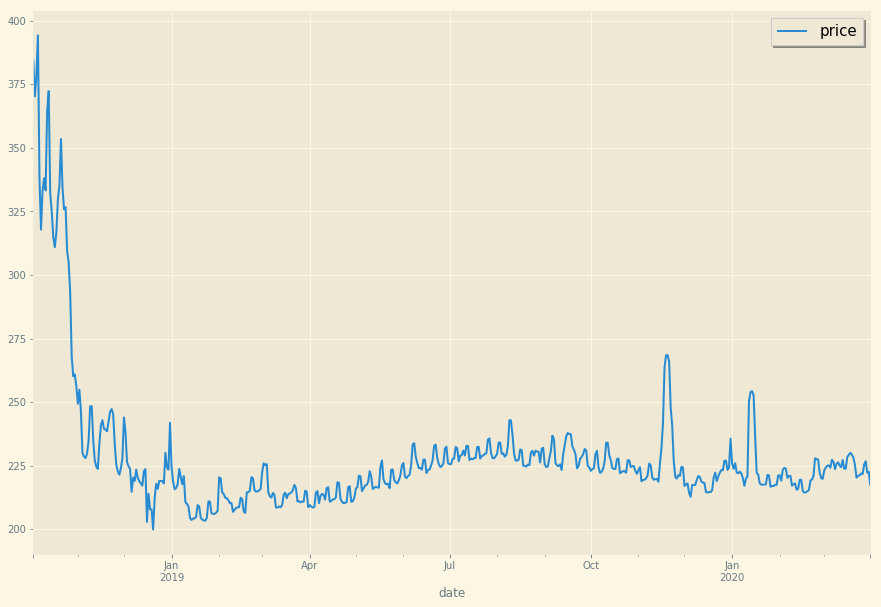

In [64]:
j = calendar.groupby(['date'])['price'].mean().plot(figsize = (15,10))

###Set plot aesthetics###

#Set Title

#Set Axes

#Set legend
j.legend(frameon = True, loc = 'upper right',fancybox = False, shadow = True, fontsize = 15)

**Avg price comparison for available and unavailable listings**

In [68]:
#Capture avg price for a stay for available and unavailable listings
available_avg_price = calendar[calendar.available == 1].groupby(['date'])['price'].mean().reset_index()
unavailable_avg_price= calendar[calendar.available == 0].groupby(['date'])['price'].mean().reset_index()

#Rename column headers
available_avg_price.columns = ['Date', 'Avg_Price']
unavailable_avg_price.columns = ['Date', 'Avg_Price']

#Set Date as index
available_avg_price.set_index('Date', inplace=True)
unavailable_avg_price.set_index('Date', inplace=True)

#Check
display(available_avg_price.head())
display(unavailable_avg_price.head())

,Avg_Price
Date,
2018-10-03,385
2018-10-04,370
2018-10-05,378
2018-10-06,394
2018-10-07,338


,Avg_Price
Date,
2018-10-03,nan
2018-10-04,nan
2018-10-05,nan
2018-10-06,nan
2018-10-07,nan


*We'll need to filter dates on price to get axes to match*

In [76]:
#Find index of first non-missing value in unavailable_avg_price
print('First non-missing Avg_Price:', unavailable_avg_price.Avg_Price.first_valid_index())

#Filter avg_price data frames to include dates from 2019-01-09 and onwards
available_avg_price = available_avg_price.loc[(available_avg_price.index >= '2019-01-09')]
unavailable_avg_price = unavailable_avg_price.loc[(unavailable_avg_price.index >= '2019-01-09')]

First non-missing Avg_Price: 2019-01-09 00:00:00


- Merge data frames
- Clean up visuals
- Extract data by month
- Extract data by days of week
- Extract data from most expensive/booked days of the year to travel

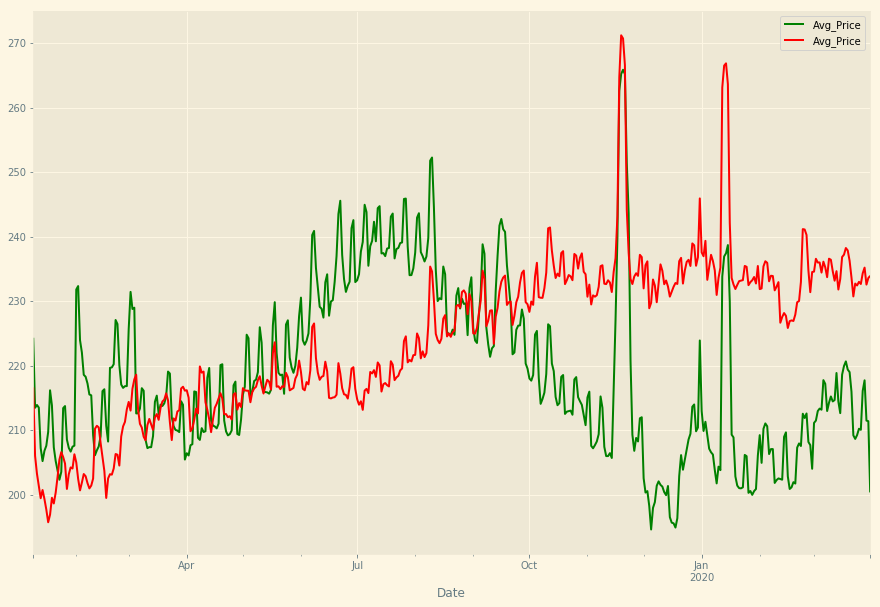

In [77]:
#Set plot size
fig, ax = plt.subplots(figsize = (15,10))

#plot data
available_avg_price.plot(ax=ax, color = 'g')
unavailable_avg_price.plot(ax=ax, color = 'r')

###Set plot aesthetics###

#Set Title

#Set axes

#Set legend

Extracting avg price data by month and days of the week

# Export Time Series Data

In [18]:
# #Set path to write listings
# path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate\2020_0407_Calendar_Cleaned.csv'

# #Write listings to path
# calendar.to_csv(path, sep=',')